In [1]:
import numpy as np
import pandas as pd
df = pd.read_excel("Assignment for Data Scientist.xlsx", sheet_name = 'Sheet1')
df.head()

,ID,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,BU79786,Christine,Dhaka,F,Married,42,56274
1,QZ44356,Susan,Rajshahi,F,Single,32,0
2,AI49188,Margaret,Khulna,F,Married,48,48767
3,WW63253,David,Barishal,M,Married,32,0
4,HB64268,Peter,Mymensingh,M,Single,24,43836


> Converting sheet1 into a CSV file:

In [3]:
df.to_csv('sheet1.csv', encoding='utf-8', index=False)

In [4]:
sheet1 = pd.read_csv("sheet1.csv")
sheet1.head()

,ID,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,BU79786,Christine,Dhaka,F,Married,42,56274
1,QZ44356,Susan,Rajshahi,F,Single,32,0
2,AI49188,Margaret,Khulna,F,Married,48,48767
3,WW63253,David,Barishal,M,Married,32,0
4,HB64268,Peter,Mymensingh,M,Single,24,43836


In [5]:
df.isnull().sum()

ID               0
Customer Name    0
Division         0
Gender           0
MaritalStatus    0
Age              0
Income           0
dtype: int64

In [6]:
df['Division'].value_counts()

Khulna        7
Sylhet        7
Rangpur       7
Chattogram    7
Dhaka         6
Rajshahi      6
Mymensingh    6
Barishal      4
Name: Division, dtype: int64

> Some basic Visualization:

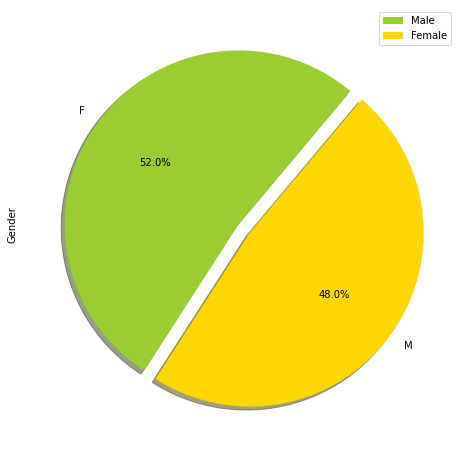

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,8)
color = ['yellowgreen','gold']
labels =['Male','Female']
df['Gender'].value_counts().plot.pie(colors=color,explode=(0,0.08),startangle=50,shadow=True,autopct="%0.1f%%")
plt.legend(labels,loc='best')
plt.axis('on');

- 52% of the whole dataset consists of Female data
- And 48% of the whole dataset consists of male data

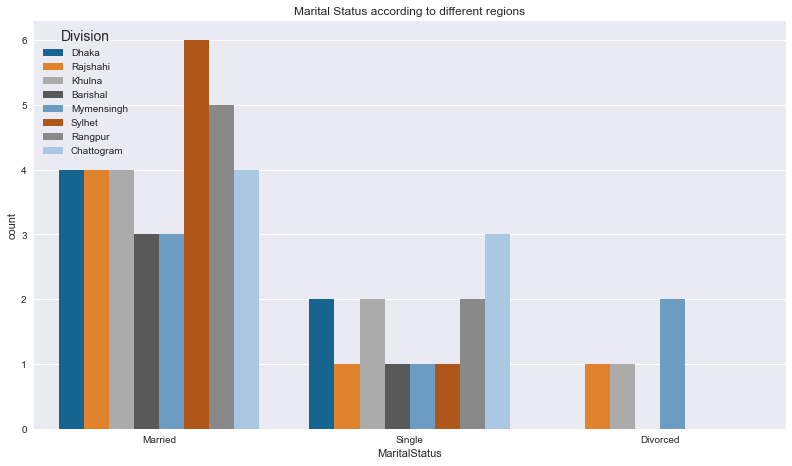

In [56]:
plt.figure(figsize=(12,7))
plt.style.use("tableau-colorblind10")
sns.countplot(data = df, x="MaritalStatus", hue="Division" )
plt.title("Marital Status according to different regions")
plt.show()

- Sylhet has the highest number of married people.
- Chattogram has the highest number of single people
- And Mymensingh has the highest number of Divorced people

In [55]:
df.groupby("Division")['Income'].agg('sum').sort_values(ascending = False)

Division
Khulna        382133
Dhaka         317069
Chattogram    260128
Mymensingh    258850
Rangpur       210414
Sylhet        172979
Rajshahi      167389
Barishal       61859
Name: Income, dtype: int64

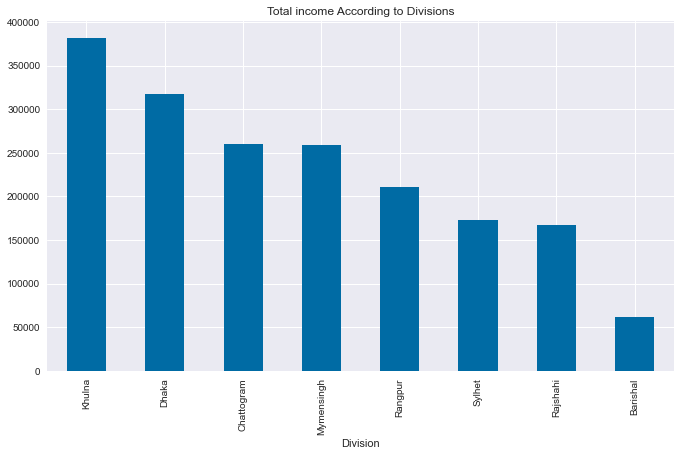

In [54]:
plt.figure(figsize=(10,6))
df.groupby("Division")['Income'].agg('sum').sort_values(ascending = False).plot(kind = 'bar') #,color = color
plt.title("Total income According to Divisions")
plt.show()

- So, in total Khulna region has the highest income.

> Clustering:

> Dropping the column named ID from the data frame:

In [57]:
df.drop("ID", axis = 1, inplace = True)
df.head(3)

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,Christine,Dhaka,F,Married,42,56274
1,Susan,Rajshahi,F,Single,32,0
2,Margaret,Khulna,F,Married,48,48767


> Label Encoding:

In [58]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

col = ["Division", "Gender", "MaritalStatus"]
for c in col:
    df[c] = lb.fit_transform(df[c])
df.head(3)

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,Christine,2,0,1,42,56274
1,Susan,5,0,2,32,0
2,Margaret,3,0,1,48,48767


> Now, for the clustering purpose, I'm going to use Age and Income. So, i'll drop the other features.

In [60]:
cluster_df = df.drop(['Customer Name', 'Division', 'Gender', 'MaritalStatus'], axis = 1)
cluster_df.head(3)

,Age,Income
0,42,56274
1,32,0
2,48,48767


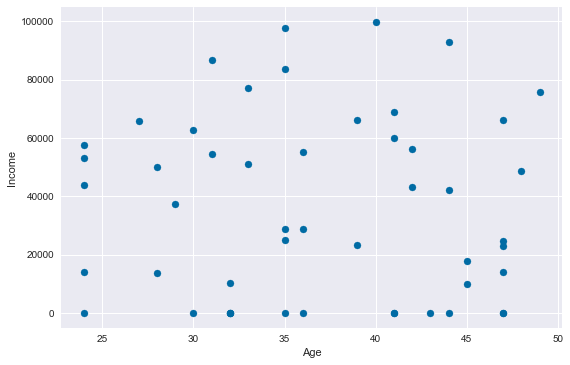

In [62]:
plt.scatter(cluster_df.Age,cluster_df.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

> Most of the values are scattered.

> The range of Age and Income values are very different. So, i'll first scale the data, using MinMax Scaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(cluster_df[['Income']])
cluster_df['Income'] = scaler.transform(cluster_df[['Income']])

scaler.fit(cluster_df[['Age']])
cluster_df['Age'] = scaler.transform(cluster_df[['Age']])

> Now i'm going to create a clustering model using Kmeans Clustaring, first i'll apply k = 8, since the dataset consists of 8 divisions data.

In [64]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8)
y_predicted = km.fit_predict(cluster_df[['Age','Income']])
y_predicted

array([5, 1, 0, 1, 2, 2, 5, 4, 4, 3, 4, 1, 6, 6, 6, 4, 3, 3, 2, 0, 2, 7,
       7, 4, 4, 6, 7, 1, 6, 0, 4, 5, 1, 2, 2, 5, 5, 2, 4, 2, 1, 2, 5, 5,
       0, 4, 1, 3, 4, 4])

In [65]:
cluster_df['cluster']=y_predicted
cluster_df.head()

,Age,Income,cluster
0,0.72,0.563614,5
1,0.32,0.000000,1
2,0.96,0.488427,0
3,0.32,0.000000,1
4,0.00,0.439041,2


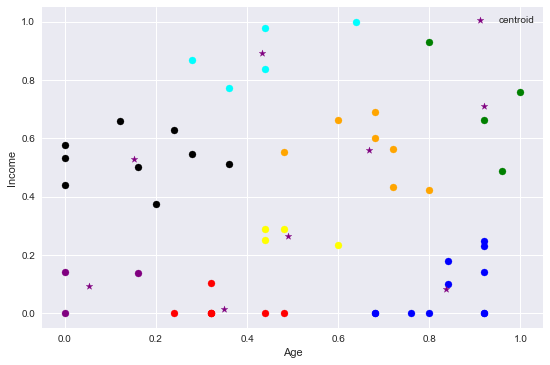

In [69]:
df1 = cluster_df[cluster_df.cluster==0]
df2 = cluster_df[cluster_df.cluster==1]
df3 = cluster_df[cluster_df.cluster==2]
df4 = cluster_df[cluster_df.cluster==3]
df5 = cluster_df[cluster_df.cluster==4]
df6 = cluster_df[cluster_df.cluster==5]
df7 = cluster_df[cluster_df.cluster==6]
df8 = cluster_df[cluster_df.cluster==7]

plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(df4.Age,df4['Income'],color='yellow')
plt.scatter(df5.Age,df5['Income'],color='blue')
plt.scatter(df6.Age,df6['Income'],color='orange')
plt.scatter(df7.Age,df7['Income'],color='cyan')
plt.scatter(df8.Age,df8['Income'],color='purple')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()